# Spark - Gas Consumption Mini Project - Big Data Processing with Spark - ENSAI - Dimitrios Fikos

## Download the data for Prices, Services and Stations

In [2]:
! pip install pyspark
import pyspark
spark = pyspark.sql.SparkSession.builder.appName("GasPriceForecasting").config("spark.executor.memory", "4g").getOrCreate()

spark

In [3]:
#from google.colab import drive
#drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [4]:
gas_path1 = "/content/drive/MyDrive/Stations2022.csv"
gas_path2 = "/content/drive/MyDrive/Services2022.csv"
gas_path3 = "/content/drive/MyDrive/Prix2019.csv"
gas_path4 = "/content/drive/MyDrive/Prix2020.csv"
gas_path5 = "/content/drive/MyDrive/Prix2021.csv"
gas_path6 = "/content/drive/MyDrive/Prix2022S1.csv"
gas_path7 = "/content/drive/MyDrive/Prix2022S2.csv"
gas_path8 = "/content/drive/MyDrive/Prix2023.csv"



In [5]:
#Add the headers to each csv

columns_Stations = ["id_pdv", "zip_code", "pop", "latitude","longitude","address","city"]
columns_Services = ["id_pdv", "zip_code", "pop", "latitude","longitude","services"]
columns_Prices = ["id_pdv", "zip_code", "pop", "latitude","longitude","date","gas_id","gas_label","price"]

In [6]:
# convert the 8 csv to dataframes to work wit spark
df_Stations = spark.read.csv(gas_path1,sep='|', header=False, inferSchema=True).toDF(*columns_Stations)
df_Services = spark.read.csv(gas_path2,sep='|',header=False, inferSchema=True).toDF(*columns_Services)
df_Price2019 = spark.read.csv(gas_path3,sep=';', header=False, inferSchema=True).toDF(*columns_Prices)
df_Price2020 = spark.read.csv(gas_path4, sep=';',header=False, inferSchema=True).toDF(*columns_Prices)
df_Price2021 = spark.read.csv(gas_path5, sep=';',header=False, inferSchema=True).toDF(*columns_Prices)
df_Price2022a = spark.read.csv(gas_path6,sep=';', header=False, inferSchema=True).toDF(*columns_Prices)
df_Price2022b = spark.read.csv(gas_path7, sep=';',header=False, inferSchema=True).toDF(*columns_Prices)
df_Price2023 = spark.read.csv(gas_path8, sep=';',header=False, inferSchema=True).toDF(*columns_Prices)

## Data Preparation 1

Read the data to see potential problems. For the prices of 2022 and 2023 I multiply them with 1000 so as to be the same with the prices of 2019, 2020, 2021. (Of course the actual prices are in decimal type and not in thousands but for the structure of this project it was easier to work with thousands)

In [7]:
df_Stations.show(5)


+-------+--------+---+-------------+-------------+--------------------+--------------------+
| id_pdv|zip_code|pop|     latitude|    longitude|             address|                city|
+-------+--------+---+-------------+-------------+--------------------+--------------------+
|1000001|    1000|  R|    4620100.0|     519800.0|596 AVENUE DE TRE...|SAINT-DENIS-LèS-B...|
|1000002|    1000|  R|    4621842.0|     522767.0| 16 Avenue de Marboz|     BOURG-EN-BRESSE|
|1000004|    1000|  R|    4618800.0|     524500.0|20 Avenue du Maré...|     Bourg-en-Bresse|
|1000005|    1000|  R|4620093.59235|519942.024022|642 Avenue de Tré...|SAINT-DENIS-LèS-B...|
|1000006|    1000|  R|    4620754.0|     523758.0|1 Boulevard John ...|     BOURG-EN-BRESSE|
+-------+--------+---+-------------+-------------+--------------------+--------------------+
only showing top 5 rows



In [8]:
df_Services.show(5)

+-------+--------+---+-------------+-------------+--------------------+
| id_pdv|zip_code|pop|     latitude|    longitude|            services|
+-------+--------+---+-------------+-------------+--------------------+
|1000001|    1000|  R|    4620100.0|     519800.0|Station de gonfla...|
|1000002|    1000|  R|    4621842.0|     522767.0|Vente de gaz dome...|
|1000004|    1000|  R|    4618800.0|     524500.0|Toilettes publiqu...|
|1000005|    1000|  R|4620093.59235|519942.024022|Boutique alimenta...|
|1000006|    1000|  R|    4620754.0|     523758.0|Vente de gaz dome...|
+-------+--------+---+-------------+-------------+--------------------+
only showing top 5 rows



In [9]:
from pyspark.sql.functions import col
df_Price2019.show(5)

+-------+--------+---+---------+---------+-------------------+------+---------+-----+
| id_pdv|zip_code|pop| latitude|longitude|               date|gas_id|gas_label|price|
+-------+--------+---+---------+---------+-------------------+------+---------+-----+
|1000001|    1000|  R|4620114.0| 519791.0|2019-01-04 10:53:48|     1|   Gazole| 1328|
|1000001|    1000|  R|4620114.0| 519791.0|2019-01-07 10:25:25|     1|   Gazole| 1348|
|1000001|    1000|  R|4620114.0| 519791.0|2019-01-10 08:54:28|     1|   Gazole| 1374|
|1000001|    1000|  R|4620114.0| 519791.0|2019-01-11 10:01:54|     1|   Gazole| 1387|
|1000001|    1000|  R|4620114.0| 519791.0|2019-01-14 11:04:53|     1|   Gazole| 1394|
+-------+--------+---+---------+---------+-------------------+------+---------+-----+
only showing top 5 rows



In [10]:
df_Price2020.show(5)

+-------+--------+---+---------+---------+-------------------+------+---------+-----+
| id_pdv|zip_code|pop| latitude|longitude|               date|gas_id|gas_label|price|
+-------+--------+---+---------+---------+-------------------+------+---------+-----+
|1000001|    1000|  R|4620114.0| 519791.0|2020-01-03 10:36:03|     1|   Gazole| 1442|
|1000001|    1000|  R|4620114.0| 519791.0|2020-01-06 10:36:17|     1|   Gazole| 1443|
|1000001|    1000|  R|4620114.0| 519791.0|2020-01-07 10:48:14|     1|   Gazole| 1458|
|1000001|    1000|  R|4620114.0| 519791.0|2020-01-28 15:18:55|     1|   Gazole| 1456|
|1000001|    1000|  R|4620114.0| 519791.0|2020-01-30 10:13:59|     1|   Gazole| 1431|
+-------+--------+---+---------+---------+-------------------+------+---------+-----+
only showing top 5 rows



In [11]:
df_Price2021.show(5)

+-------+--------+---+---------+---------+-------------------+------+---------+-----+
| id_pdv|zip_code|pop| latitude|longitude|               date|gas_id|gas_label|price|
+-------+--------+---+---------+---------+-------------------+------+---------+-----+
|1000001|    1000|  R|4620114.0| 519791.0|2021-01-02 15:13:25|     1|   Gazole| 1252|
|1000001|    1000|  R|4620114.0| 519791.0|2021-01-04 09:28:43|     1|   Gazole| 1268|
|1000001|    1000|  R|4620114.0| 519791.0|2021-01-06 09:29:19|     1|   Gazole| 1268|
|1000001|    1000|  R|4620114.0| 519791.0|2021-01-06 15:45:51|     1|   Gazole| 1268|
|1000001|    1000|  R|4620114.0| 519791.0|2021-01-07 09:44:40|     1|   Gazole| 1273|
+-------+--------+---+---------+---------+-------------------+------+---------+-----+
only showing top 5 rows



In [12]:
df_Price2022a=df_Price2022a.withColumn('price',col("price") * 1000)
df_Price2022a.show(5)

+-------+--------+---+---------+---------+-------------------+------+---------+------+
| id_pdv|zip_code|pop| latitude|longitude|               date|gas_id|gas_label| price|
+-------+--------+---+---------+---------+-------------------+------+---------+------+
|1000001|    1000|  R|4620100.0| 519800.0|2022-01-03 08:44:18|     1|   Gazole|1572.0|
|1000001|    1000|  R|4620100.0| 519800.0|2022-01-05 10:08:11|     1|   Gazole|1560.0|
|1000001|    1000|  R|4620100.0| 519800.0|2022-01-10 10:09:08|     1|   Gazole|1603.0|
|1000001|    1000|  R|4620100.0| 519800.0|2022-01-17 12:34:42|     1|   Gazole|1616.0|
|1000001|    1000|  R|4620100.0| 519800.0|2022-01-17 12:34:44|     1|   Gazole|1616.0|
+-------+--------+---+---------+---------+-------------------+------+---------+------+
only showing top 5 rows



In [13]:
df_Price2022b=df_Price2022b.withColumn('price',col("price") * 1000)
df_Price2022b.show(5)

+-------+--------+---+---------+---------+-------------------+------+---------+------+
| id_pdv|zip_code|pop| latitude|longitude|               date|gas_id|gas_label| price|
+-------+--------+---+---------+---------+-------------------+------+---------+------+
|1000001|    1000|  R|4620100.0| 519800.0|2022-07-01 11:23:43|     1|   Gazole|2090.0|
|1000001|    1000|  R|4620100.0| 519800.0|2022-07-05 09:59:49|     1|   Gazole|2090.0|
|1000001|    1000|  R|4620100.0| 519800.0|2022-07-09 09:24:59|     1|   Gazole|1952.0|
|1000001|    1000|  R|4620100.0| 519800.0|2022-07-11 11:07:30|     1|   Gazole|1937.0|
|1000001|    1000|  R|4620100.0| 519800.0|2022-07-13 10:57:17|     1|   Gazole|1948.0|
+-------+--------+---+---------+---------+-------------------+------+---------+------+
only showing top 5 rows



In [14]:
df_Price2023=df_Price2023.withColumn('price',col("price") * 1000)
df_Price2023.show(5)

+-------+--------+---+---------+---------+-------------------+------+---------+------+
| id_pdv|zip_code|pop| latitude|longitude|               date|gas_id|gas_label| price|
+-------+--------+---+---------+---------+-------------------+------+---------+------+
|1000001|    1000|  R|4620100.0| 519800.0|2023-01-02 07:53:26|     1|   Gazole|1867.0|
|1000001|    1000|  R|4620100.0| 519800.0|2023-01-05 09:33:37|     1|   Gazole|1877.0|
|1000001|    1000|  R|4620100.0| 519800.0|2023-01-09 14:51:49|     1|   Gazole|1875.0|
|1000001|    1000|  R|4620100.0| 519800.0|2023-01-11 09:23:54|     1|   Gazole|1859.0|
|1000001|    1000|  R|4620100.0| 519800.0|2023-01-13 09:07:40|     1|   Gazole|1862.0|
+-------+--------+---+---------+---------+-------------------+------+---------+------+
only showing top 5 rows



Time to connect all these dataframes into a single dataframe

In [15]:
## concatenate the Prices dataframes
from functools import reduce
from pyspark.sql import DataFrame
# List of DataFrames
dfs = [df_Price2019, df_Price2020, df_Price2021, df_Price2022a, df_Price2022b, df_Price2023]

# Use the reduce function to iteratively apply union to all DataFrames
df_concatenated = reduce(DataFrame.union, dfs)

# Show the resulting concatenated DataFrame
df_concatenated.show(10)

+-------+--------+---+---------+---------+-------------------+------+---------+------+
| id_pdv|zip_code|pop| latitude|longitude|               date|gas_id|gas_label| price|
+-------+--------+---+---------+---------+-------------------+------+---------+------+
|1000001|    1000|  R|4620114.0| 519791.0|2019-01-04 10:53:48|     1|   Gazole|1328.0|
|1000001|    1000|  R|4620114.0| 519791.0|2019-01-07 10:25:25|     1|   Gazole|1348.0|
|1000001|    1000|  R|4620114.0| 519791.0|2019-01-10 08:54:28|     1|   Gazole|1374.0|
|1000001|    1000|  R|4620114.0| 519791.0|2019-01-11 10:01:54|     1|   Gazole|1387.0|
|1000001|    1000|  R|4620114.0| 519791.0|2019-01-14 11:04:53|     1|   Gazole|1394.0|
|1000001|    1000|  R|4620114.0| 519791.0|2019-01-16 10:21:21|     1|   Gazole|1394.0|
|1000001|    1000|  R|4620114.0| 519791.0|2019-01-17 08:30:12|     1|   Gazole|1391.0|
|1000001|    1000|  R|4620114.0| 519791.0|2019-01-18 10:08:25|     1|   Gazole|1401.0|
|1000001|    1000|  R|4620114.0| 519791.0|2

In [16]:
# merge Prices dataframe with stations

common_columns=["id_pdv", "zip_code", "pop", "latitude","longitude"]

df_result = df_concatenated.join(df_Stations, on=common_columns, how="outer")

# merge Prices dataframe with services

common_columns=["id_pdv", "zip_code", "pop", "latitude","longitude"]

df_gas = df_result.join(df_Services, on=common_columns, how="outer")

# Show the resulting DataFrame
#df_gas.show()

In [17]:
## split time and year
from pyspark.sql.functions import year, month, weekofyear, col, to_date
df_gas = df_gas.withColumn("timestamp", to_date(col("date")))

# Split the date into year, month, and week of the year
df_gas = df_gas.withColumn("year", year("timestamp"))
df_gas = df_gas.withColumn("month", month("timestamp"))
df_gas = df_gas.withColumn("week_of_year", weekofyear("timestamp"))

## it seems that all data are string type. so i will change them to the real types
df_gas.summary()

from pyspark.sql.functions import col
from pyspark.sql.types import IntegerType, DoubleType

columns_to_convert = ["id_pdv", "zip_code",  "latitude", "longitude", "price", "year", "month", "week_of_year"]
target_data_types = [IntegerType(), IntegerType(),  DoubleType(), DoubleType(), IntegerType(), IntegerType(), IntegerType(), IntegerType()]

# Apply the cast operation to change data types
for col_name, target_type in zip(columns_to_convert, target_data_types):
    df_gas = df_gas.withColumn(col_name, col(col_name).cast(target_type))

# Show the resulting DataFrame
df_gas.printSchema()
#df_gas.show(5)


root
 |-- id_pdv: integer (nullable = true)
 |-- zip_code: integer (nullable = true)
 |-- pop: string (nullable = true)
 |-- latitude: double (nullable = true)
 |-- longitude: double (nullable = true)
 |-- date: timestamp (nullable = true)
 |-- gas_id: integer (nullable = true)
 |-- gas_label: string (nullable = true)
 |-- price: integer (nullable = true)
 |-- address: string (nullable = true)
 |-- city: string (nullable = true)
 |-- services: string (nullable = true)
 |-- timestamp: date (nullable = true)
 |-- year: integer (nullable = true)
 |-- month: integer (nullable = true)
 |-- week_of_year: integer (nullable = true)



In [18]:
# converting latitude and longitude

df_gas=df_gas.withColumn("longitude", col("longitude") / 1e5)
df_gas= df_gas.withColumn("latitude", col("latitude") / 1e5)
#df_gas.show(10)

In [19]:
## see the gas labels, the average price and standard deviation of gas

df_gas.groupBy('gas_label').agg({'price' : 'mean'}).show()

df_gas.groupBy('gas_label').agg({'price' : 'stddev'}).show()

# count the number that each label appears in the dataframe
df_gas.groupBy('gas_label').count().show()

+---------+------------------+
|gas_label|        avg(price)|
+---------+------------------+
|      E10|1628.2710115788761|
|     SP98|1711.4766606480578|
|     NULL|              NULL|
|      E85| 841.5693985206469|
|   Gazole| 1597.148563452008|
|     SP95|1640.5942364973107|
|     GPLc| 898.2866171465688|
+---------+------------------+

+---------+------------------+
|gas_label|     stddev(price)|
+---------+------------------+
|      E10|225.61798880875426|
|     SP98|229.87353712065726|
|     NULL|              NULL|
|      E85|182.26540903944084|
|   Gazole|260.71211914208703|
|     SP95|226.16458926053318|
|     GPLc|100.72609713297445|
+---------+------------------+

+---------+-------+
|gas_label|  count|
+---------+-------+
|      E10|5534734|
|     SP98|5543363|
|     NULL|  18882|
|      E85|1620438|
|   Gazole|6671688|
|     SP95|1641710|
|     GPLc| 957591|
+---------+-------+



From the mean and the count of appearances I have decided to remove the "GPLc" and "SP95" types.  

In [20]:
df_gas = df_gas.filter(~col("gas_label").isin("NULL", "E85","GPLc"))


## Data Preparation Step 2

In [21]:
## find the average price per day per gas type
from pyspark.sql.functions import col, avg

avg_price_per_gas = df_gas.groupBy('gas_label','timestamp').agg(avg('price').alias('avg_day_prices'))

# Show the result
#avg_price_per_gas.show(10)

In [22]:
# join the new column to the dataframe
df_gas = df_gas.join(avg_price_per_gas, on=['gas_label', 'timestamp'], how='left')

# Show the result
#df_gas.show()


In [23]:
## create new column price index
df_gas = df_gas.withColumn("price_index", 100 * ((col("price") - col("avg_day_prices")) / col("avg_day_prices")) + 1)

# Show the result
df_gas.show(10)

+---------+----------+-------+--------+---+--------+---------+-------------------+------+-----+-------+----+--------+----+-----+------------+------------------+--------------------+
|gas_label| timestamp| id_pdv|zip_code|pop|latitude|longitude|               date|gas_id|price|address|city|services|year|month|week_of_year|    avg_day_prices|         price_index|
+---------+----------+-------+--------+---+--------+---------+-------------------+------+-----+-------+----+--------+----+-----+------------+------------------+--------------------+
|   Gazole|2019-01-07|1000001|    1000|  R|46.20114|  5.19791|2019-01-07 10:25:25|     1| 1348|   NULL|NULL|    NULL|2019|    1|           2| 1388.583114150447| -1.9226276581417538|
|   Gazole|2019-01-04|1000001|    1000|  R|46.20114|  5.19791|2019-01-04 10:53:48|     1| 1328|   NULL|NULL|    NULL|2019|    1|           1|1386.5670557146002|  -3.223889170972426|
|   Gazole|2019-01-18|1000001|    1000|  R|46.20114|  5.19791|2019-01-18 10:08:25|     1| 

In [24]:
# here i wanted to check if the prices are correct and to avoid having extreme outliers
#df_gas.describe('price').show()

+-------+------------------+
|summary|             price|
+-------+------------------+
|  count|          19391495|
|   mean| 1642.392203076658|
| stddev|243.87771881039163|
|    min|                 1|
|    max|              9999|
+-------+------------------+



In [25]:
df_gas.describe('week_of_year').show() #checked the actual number of weeks per year that i will use it for the week index (maximum value 53)

In [25]:
df_gas.describe('price_index').show()

+-------+------------------+
|summary|       price_index|
+-------+------------------+
|  count|          19391495|
|   mean|0.9999999999997222|
| stddev| 4.883744769066138|
|    min|-98.94902310467094|
|    max| 498.9728924930767|
+-------+------------------+



In [26]:
## create the week index variable

df_gas = df_gas.withColumn("week_index", (col("year") - 2019) * 53 + col("week_of_year"))

df_gas.describe('week_index').show()

+-------+------------------+
|summary|        week_index|
+-------+------------------+
|  count|          19391495|
|   mean|135.26360953603628|
| stddev| 76.70317113245953|
|    min|                 1|
|    max|               264|
+-------+------------------+



## Data Visualisation

In [27]:
### compute a new variable that represents the average price per week for each type
avg_price_per_week = df_gas.groupBy('gas_label', 'week_index').agg(avg('price').alias('weekly_avg_price'))
avg_price_per_week.show()

+---------+----------+------------------+
|gas_label|week_index|  weekly_avg_price|
+---------+----------+------------------+
|      E10|        38|1490.7732591676968|
|     SP95|        51|1530.6510704419888|
|      E10|        22|1568.1277464514874|
|   Gazole|        20|1495.4959804121609|
|     SP95|        19|1578.4510569105692|
|     SP95|        34|1490.0085112737047|
|   Gazole|        14|1475.5626392230242|
|   Gazole|        49|1466.0890288573216|
|   Gazole|        36|1420.6468662301215|
|     SP95|        32|1507.7538944723617|
|     SP95|         7| 1446.824758629811|
|     SP98|        10| 1544.464182655799|
|   Gazole|         4| 1430.798795278137|
|   Gazole|        10|1474.4341013006615|
|      E10|        21|1574.4628433691105|
|     SP95|        28|1522.1304032842309|
|     SP95|         9|1473.2158631834097|
|      E10|        39| 1495.364907998498|
|     SP98|        15|1631.1609724332538|
|     SP98|        30|1592.7536245483977|
+---------+----------+------------

In [28]:
#convert it to pandas so as to do the visualization part
avg_price_per_week = df_gas.groupBy('gas_label', 'week_index').agg(avg('price').alias('weekly_avg_price')).toPandas()

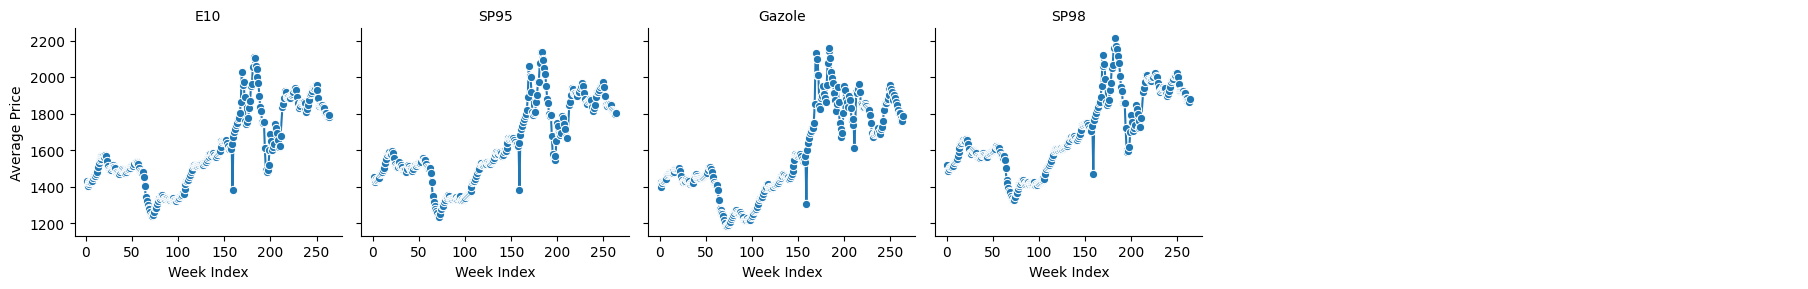

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

g = sns.FacetGrid(avg_price_per_week, col='gas_label', col_wrap=6)
g.map(sns.lineplot, 'week_index', 'weekly_avg_price', marker='o')

# Customize the plot
g.set_axis_labels("Week Index", "Average Price")
g.set_titles(col_template="{col_name}")
g.add_legend()


# Show the plot
plt.show()

The plots present the weekly evolution of the price of each gas type.

## Modeling-Forecasting next day price

Variable that will be forecasted : price

For the prediction of the price the variables that will be used are:

1) id_pdv: the point of sales

2) gas_id: the four (remaining) types of gas

3) avg_day_prices: average price in a day for a gas type

4) week_index: the number of each week

5) lag_price_1: new variable representing the lag price for the previous day

6) lag_price_2: new variable representing the lag price for two days ago

In [30]:
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.regression import LinearRegression
from pyspark.ml import Pipeline
from pyspark.ml.evaluation import RegressionEvaluator
from pyspark.sql import functions as F
from pyspark.sql.window import Window
from pyspark.ml.feature import StringIndexer, OneHotEncoder, Imputer

In [31]:
# order the rows by date
df_gas = df_gas.orderBy('date')

In [32]:
# Define the lag window specification
lagged_window = Window.partitionBy("gas_label",'id_pdv').orderBy("date")

# Include lag features for the last two days
for i in range(1, 3):
    lag_col = f"lag_price_{i}"
    df_gas = df_gas.withColumn(lag_col, F.lag(col("price"), i).over(lagged_window))

In [33]:
# drop na values from the dataframe and show the data frame with the two lag values included
df_gas = df_gas.na.drop()
#df_gas.show(10)

+---------+----------+-------+--------+---+-------------+-----------------+-------------------+------+-----+--------------------+---------------+--------------------+----+-----+------------+------------------+-------------------+----------+-----------+-----------+
|gas_label| timestamp| id_pdv|zip_code|pop|     latitude|        longitude|               date|gas_id|price|             address|           city|            services|year|month|week_of_year|    avg_day_prices|        price_index|week_index|lag_price_1|lag_price_2|
+---------+----------+-------+--------+---+-------------+-----------------+-------------------+------+-----+--------------------+---------------+--------------------+----+-----+------------+------------------+-------------------+----------+-----------+-----------+
|      E10|2019-01-03|1000013|    1000|  R|46.1985183794|5.243506378809999|2019-01-03 00:01:00|     5| 1319|BOULEVARD CHARLES...|Bourg-en-Bresse|Carburant additiv...|2019|    1|           1|1392.3583937198

In [42]:
# for the values that we have to put in the vector assembler we have to use onehotencoder for the types of gas
gas_id_encoder = OneHotEncoder(inputCol='gas_id', outputCol='gas_id_onehot')

# assemble features into a single column
op_features = VectorAssembler(inputCols=['id_pdv', 'gas_id_onehot',  'avg_day_prices','week_index','lag_price_1','lag_price_2'],
                              outputCol='features')


For the forecasting of the price the Linear Regression model will be used

In [37]:
from pyspark.ml.regression import LinearRegression

#split the dataframe into traning set and test set (80% for the training and 20% for the test)
train_data, test_data = df_gas.randomSplit([0.8, 0.2], seed=42)

# Create a Linear Regression model
lr = LinearRegression(labelCol='price', featuresCol='features')

# Create a pipeline
pipeline = Pipeline(stages=[ gas_id_encoder, op_features, lr])

# Fit the model into the training data
model = pipeline.fit(train_data)

# Make predictions for the test set
predictions = model.transform(test_data)

In [38]:
# we have predictions ready after the training and it can be shown here in the last column of the dataframe
# as we can see the prediction is not really far from the variable 'price'
predictions.show(5, truncate = True)

# Evaluate the model using Root Mean Squared Error an useful Metric when dealing with continuous numeric outcomes like the ones we have here.
evaluator = RegressionEvaluator(labelCol="price", predictionCol="prediction", metricName="rmse")
rmse = evaluator.evaluate(predictions) # We evaluate the test dataset on the fitting trained dataset
print(f"Root Mean Squared Error (RMSE): {rmse}")



+---------+----------+--------+--------+---+--------+---------+-------------------+------+-----+----------------------------+----------+---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+----+-----+------------+------------------+-------------------+----------+-----------+-----------+-------------+--------------------------------------------------------------------------+------------------+
|gas_label|timestamp |id_pdv  |zip_code|pop|latitude|longitude|date               |gas_id|price|address                     |city      |services                                                                                                                                                                                                                                                     

In [40]:
# 5. Prediction on a given gas type and station

station_to_predict = '17350001'
gas_label_to_predict = 'Gazole' # price -> 2.027

# Filter new_data for the specific station and gas type
new_data_for_prediction = df_gas.filter((col("id_pdv") == station_to_predict) & (col("gas_label") == gas_label_to_predict))

# Make predictions on the filtered new data
new_predictions = model.transform(new_data_for_prediction)

# Show the predictions
predictions.select('id_pdv', 'gas_id_onehot',  'avg_day_prices','week_index','lag_price_1','lag_price_2', 'prediction').show()



+--------+-------------+------------------+----------+-----------+-----------+------------------+
|  id_pdv|gas_id_onehot|    avg_day_prices|week_index|lag_price_1|lag_price_2|        prediction|
+--------+-------------+------------------+----------+-----------+-----------+------------------+
| 1130003|(6,[5],[1.0])|1392.3583937198068|         1|       1349|       1349|1355.9813971482401|
|14400010|(6,[5],[1.0])|1392.3583937198068|         1|       1329|       1329|1340.9115900043573|
|27200002|(6,[5],[1.0])|1392.3583937198068|         1|       1555|       1455|1494.9379723083748|
|77260005|(6,[5],[1.0])|1392.3583937198068|         1|       1362|       1349|1367.6418980093933|
|95100030|(6,[5],[1.0])|1392.3583937198068|         1|       1465|       1465|1454.0815458230957|
| 1390009|(6,[5],[1.0])|1384.9245541838134|         1|       1568|       1568|1528.4700415541606|
|22170004|(6,[5],[1.0])|1384.9245541838134|         1|       1343|       1347| 1351.951967119378|
|54300011|(6,[5],[1.

In [41]:
# finally we can see the predictions on the filtered new data
new_predictions.show(10)

+---------+----------+--------+--------+---+---------------+-------------------+-------------------+------+-----+--------------------+-------+--------------------+----+-----+------------+------------------+-----------------+----------+-----------+-----------+-------------+--------------------+------------------+
|gas_label| timestamp|  id_pdv|zip_code|pop|       latitude|          longitude|               date|gas_id|price|             address|   city|            services|year|month|week_of_year|    avg_day_prices|      price_index|week_index|lag_price_1|lag_price_2|gas_id_onehot|            features|        prediction|
+---------+----------+--------+--------+---+---------------+-------------------+-------------------+------+-----+--------------------+-------+--------------------+----+-----+------------+------------------+-----------------+----------+-----------+-----------+-------------+--------------------+------------------+
|   Gazole|2019-01-06|17350001|   17350|  A|45.89230717905

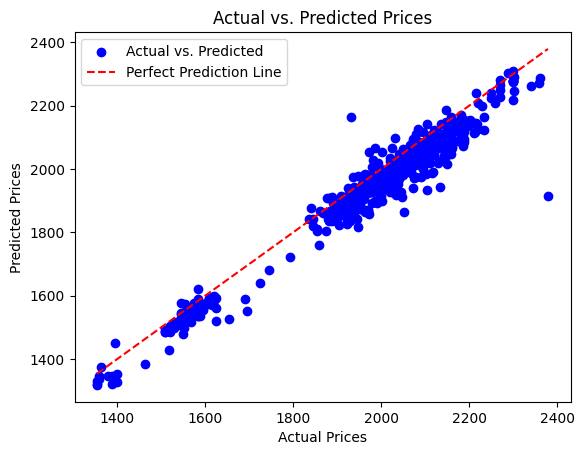

In [46]:
# convert the df to pandas to make the plot
predictions_pd = new_predictions.select('price', 'prediction').toPandas()
# Scatter plot for the actual and predicted results
plt.scatter(predictions_pd['price'], predictions_pd['prediction'], color='blue', label='Actual vs. Predicted')
plt.plot([min(predictions_pd['price']), max(predictions_pd['price'])], [min(predictions_pd['price']), max(predictions_pd['price'])], linestyle='--', color='red', label='Perfect Prediction Line')
plt.title('Actual vs. Predicted Prices')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.legend()
plt.show()

With this plot we can witness that the points that represent the actual and predicted price are really close to the perfect prediction Line, so we can say that the forecasting provided reasonable results.